# TALLER CLUSTERING (AGRUPACIÓN) - PARTE 2

**Presentado por:** Jairo Castrellón 

**Asignatura:** Minería de datos

**Universidad Nacional de Colombia**

Se cargan las librerías necesarias para el trabajo a realizar:

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import cityblock, minkowski, euclidean, cosine,matching,jaccard

## 1) Dados los ejemplos numéricos A={1,0,2,5,3} y B={2,1,0,3,-1}, encontrar:

### a) La distancia euclideana

In [0]:
A=[1,0,2,5,3]
B=[2,1,0,3,1]

Usando la libreria de distancia espacial de spicy, se obtiene:

In [59]:
euclidean(A,B)

3.7416573867739413

equivalentemente, haciendo uso de la definición de la distancia euclidiana

In [60]:
suma=0
for i in range(0,len(A)):
  y=(A[i]-B[i])**2
  suma += y
np.sqrt(suma)
  


3.7416573867739413

### b) La distancia city-block

In [61]:
cityblock(A,B)

8

Equivalentemente, comprobando mediante la fórmula:

In [62]:
suma=0
for i in range(0,len(A)):
  y=abs(A[i]-B[i])
  suma += y
suma
  

8

##c) La distancia Minkowski para p=3

In [63]:
minkowski(A, B, 3)

2.9624960684073702

Equivalentemente, comprobando mediante la fórmula:

In [64]:
suma=0
for i in range(0,len(A)):
  y=(abs(A[i]-B[i]))**3
  suma += y
suma**(1/3)

2.9624960684073702

### d) La correlación coseno

In [65]:
cosine(A,B)

0.17310176940527688

## 2) Dado los ejemplos catégoricos C={A,B,A,B,A,A} y D={B,B,A,B,B,A}, encontrar:

### a) La similaridad usando SMC (Simple matching coeficient)

In [0]:
C=["A","B","A","B","A","A"]
D=["B","B","A","B","B","A"]

In [67]:
suma=0
for i in range(0,len(C)):
  if C[i]==D[i]:
    suma += 1
suma/len(C)

0.6666666666666666

### b) La similaridad usando Jaccard


In [68]:
sum1=0
sum2=0
for i in range(0,len(C)):
  if C[i]=="A" and C[i]==D[i]:
    sum1+=1
for i in range(0,len(D)):
  if C[i]=="B" and C[i]==D[i]:
    sum2 += 1
sum1/(len(C)-sum2)

0.5

### c) La similaridad usando el Coeficiente de Rao

In [69]:
sum1=0
for i in range(0,len(C)):
  if C[i]=="A" and C[i]==D[i]:
    sum1+=1
sum1/len(C)

0.3333333333333333

## 3) Usar el algoritmo k-means y distancia Euclidean distance para agrupar los siguientes puntos en 3 grupos: A1=(2,10), A2=(2,5), A3=(8,4), A4=(5,8), A5=(7,5), A6=(6,4), A7=(1,2), A8=(4,9). Asumir los centroides iniciales: A1, A4 and A7.

Se grafican los puntos del conjunto de datos, junto con sus centroides iniciales, como se muestran a continuación:

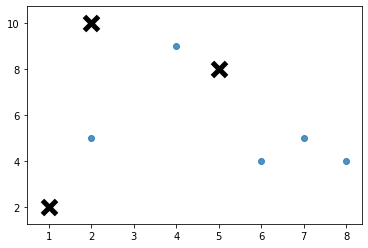

In [71]:
data=[[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]]
X = np.array(data)
c1=data[0]
c2=data[3]
c3=data[6]
initialpnts=np.array([c1,c2,c3])
plt.scatter(X[:,0],X[:,1],alpha=0.8)
plt.scatter(initialpnts[:,0], initialpnts[:,1],marker="x", lw=5, s=200, color="black")

### a) Correr una iteración y mostrar:

**1) Los nuevos grupos** 

In [0]:
n_clusters = 3
initialpnts=np.array([c1,c2,c3])
km = KMeans( n_clusters=n_clusters, init=initialpnts, max_iter= 1)
km.fit(X)##Ajustar kmeans a nuestro conjunto de datos, con los parámetros antes señalados
y = km.predict(X) #Asigna un cluster a cada valos de X

A continuación, despues de realizar una iteración, se muestran los nuevos grupos encontrados en nuestro conjunto de datos:

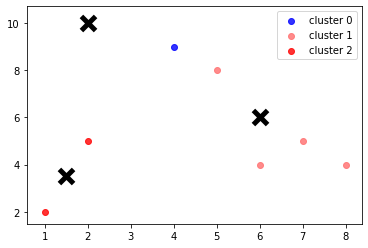

In [73]:
cmap = plt.cm.plasma

cmap((y*600./(n_clusters)).astype(int))
for i in np.unique(y):
    cmap = plt.cm.bwr
    col = cmap((i*600./(n_clusters)).astype(int))
    Xr = X[y==i]
    plt.scatter(Xr[:,0], Xr[:,1], color=col, label="cluster %d"%i, alpha=.8)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],marker="x", lw=5, s=200, color="black")
plt.legend()   

**2) Los nuevos centroides**

Los nuevos centroides, después de la primera iteración, son:

In [74]:
km.cluster_centers_

array([[ 2. , 10. ],
       [ 6. ,  6. ],
       [ 1.5,  3.5]])

### b) Iterar más. ¿Cuantas iteraciones se necesita para converger?

In [75]:
n_clusters = 3
initialpnts=np.array([c1,c2,c3])
km = KMeans( n_clusters=n_clusters, init=initialpnts, max_iter= 2)
km.fit(X)##Ajustar kmeans a nuestro conjunto de datos, con los parámetros antes señalados
y = km.predict(X) #Asigna un cluster a cada valos de X
km.cluster_centers_

array([[3.  , 9.5 ],
       [6.5 , 5.25],
       [1.5 , 3.5 ]])

In [76]:
n_clusters = 3
initialpnts=np.array([c1,c2,c3])
km = KMeans( n_clusters=n_clusters, init=initialpnts, max_iter= 3)
km.fit(X)##Ajustar kmeans a nuestro conjunto de datos, con los parámetros antes señalados
y = km.predict(X) #Asigna un cluster a cada valos de X
km.cluster_centers_

array([[3.66666667, 9.        ],
       [7.        , 4.33333333],
       [1.5       , 3.5       ]])

In [77]:
n_clusters = 3
initialpnts=np.array([c1,c2,c3])
km = KMeans( n_clusters=n_clusters, init=initialpnts, max_iter= 4)
km.fit(X)##Ajustar kmeans a nuestro conjunto de datos, con los parámetros antes señalados
y = km.predict(X) #Asigna un cluster a cada valos de X
km.cluster_centers_


array([[3.66666667, 9.        ],
       [7.        , 4.33333333],
       [1.5       , 3.5       ]])

Como se muestra en lo anterior, se puede ver que a partir de la iteración 3 los centroides no cambian de manera considerable, por lo que se podría decir que a partir de este número de iteraciones, la agrupación converge, es decir, siempre va a ser la misma. 

### c) Mostrar al converger:

**1) grupos finales**

Una vez teniendo clara la inicialización, se realiza el algorítmo de Kmeans, obteniendo como resultado el siguiente clustering (agrupación):

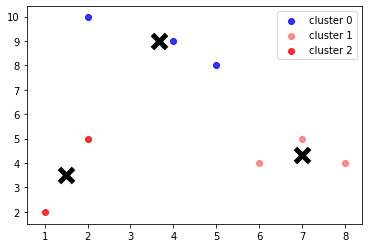

In [78]:
n_clusters = 3
initialpnts=np.array([c1,c2,c3])
km = KMeans( n_clusters=n_clusters, init=initialpnts)
km.fit(X)##Ajustar kmeans a nuestro conjunto de datos, con los parámetros antes señalados
y = km.predict(X) #Asigna un cluster a cada valos de X

cmap = plt.cm.plasma

cmap((y*600./(n_clusters)).astype(int))
for i in np.unique(y):
    cmap = plt.cm.bwr
    col = cmap((i*600./(n_clusters)).astype(int))
    Xr = X[y==i]
    plt.scatter(Xr[:,0], Xr[:,1], color=col, label="cluster %d"%i, alpha=.8)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],marker="x", lw=5, s=200, color="black")
plt.legend()  

**2) centroides finales**

De esta manera, los centroides finales son:

In [79]:
km.cluster_centers_

array([[3.66666667, 9.        ],
       [7.        , 4.33333333],
       [1.5       , 3.5       ]])

## 4) Aplicar el algoritmo k-means al conjunto de datos Iris (sin7 la clase), para k=2,3,4,5,6,7,8. Dibujar la gráfica de Elbow(codo) basada en el SSE. Explique los resultados.

A continuación se carga el dataset **iris** disponible en el repositorio UCI de machine learning. Se elimina la columna Iris-setosa, que contiene la clase de cada medición:

In [0]:
data = pd.read_csv("irist2.csv")
iris=data.drop("Iris-setosa",axis=1)
iris= np.array(iris)

Posteriormente, se usan las funciones para graficar los clusters creados por el algorítmo *kmeans*, dependiendo de la cantidad de clusters que se quieran (el valor de k)

In [82]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib

from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, DBSCAN
from IPython.display import HTML

%matplotlib inline

!wget https://gist.githubusercontent.com/fagonzalezo/d4c3992ba89f7598a75adc5290531451/raw/de2edd17e526a96ff9e063c9014f7e0c4a06e922/cluster1.csv
from sklearn.metrics import silhouette_score

def experiment_number_of_clusters(X, clustering, show_metric=True,
                                  plot_data=True, plot_centers=True, plot_boundaries=False):
    plt.figure(figsize=(15,6))
    for n_clusters in range(2,10):
        clustering.n_clusters = n_clusters
        y = clustering.fit_predict(X)

        cm = plt.cm.plasma
        plt.subplot(2,4,n_clusters-1)

        plot_cluster_predictions(clustering, X, n_clusters, cm, 
                                 plot_data, plot_centers, show_metric)
        
def plot_cluster_predictions(clustering, X, n_clusters = None, cmap = plt.cm.plasma,
                             plot_data=True, plot_centers=True, show_metric=False,
                             title_str=""):

    assert not hasattr(clustering, "n_clusters") or \
           (hasattr(clustering, "n_clusters") and n_clusters is not None), "must specify `n_clusters` for "+str(clustering)

    if n_clusters is not None:
        clustering.n_clusters = n_clusters

    y = clustering.fit_predict(X)
    # remove elements tagged as noise (cluster nb<0)
    X = X[y>=0]
    y = y[y>=0]

    if n_clusters is None:
        n_clusters = len(np.unique(y))

    if plot_data:        
        plt.scatter(X[:,0], X[:,1], color=cmap((y*255./(n_clusters-1)).astype(int)), alpha=.5)
    if plot_centers and hasattr(clustering, "cluster_centers_"):
        plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], s=150,  lw=3,
                    facecolor=cmap((np.arange(n_clusters)*255./(n_clusters-1)).astype(int)),
                    edgecolor="black")   

    if show_metric:
        if hasattr(clustering, 'inertia_'):
          inertia = clustering.inertia_
        else:
          inertia = 0
        sc = silhouette_score(X, y) if len(np.unique(y))>1 else 0
        plt.title("k=%d, inertia=%.0f sc=%.3f"%(n_clusters, inertia, sc)+title_str)
    else:
        plt.title("k=%d"%n_clusters+title_str)

    plt.axis("off")
    return

--2019-10-26 13:47:53--  https://gist.githubusercontent.com/fagonzalezo/d4c3992ba89f7598a75adc5290531451/raw/de2edd17e526a96ff9e063c9014f7e0c4a06e922/cluster1.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18736 (18K) [text/plain]
Saving to: ‘cluster1.csv.1’

cluster1.csv.1      100%[===================>]  18.30K  --.-KB/s    in 0.01s   

2019-10-26 13:47:53 (1.49 MB/s) - ‘cluster1.csv.1’ saved [18736/18736]



De esta manera, se obtienen las siguientes agrupaciones, nótese que a partir de k=3, el valor de la inercia no cambia de manera considerable, por lo que se podría considerar a k=3 un valor adecuado para el número de clusters necesarios.

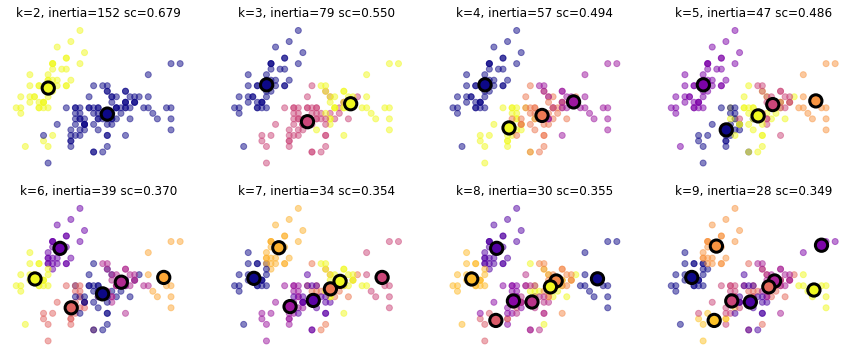

In [83]:
experiment_number_of_clusters(iris, KMeans(), show_metric=True)

Lo anterior, se puede sustentar basado en la siguiente gráfica de codo, se puede ver que apartir de k=3 no es significativo el cambio en el valor de la inercia, y a medida de que el k aumenta, es mas baja la inercia pero más compleja, y por ende innecesaria, la agrupación hecha.

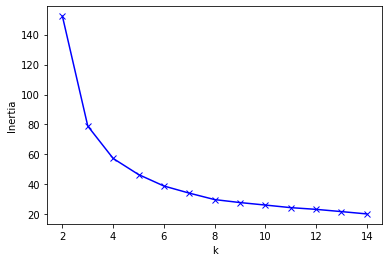

In [84]:
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(iris)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

De todo lo visto anterior, se puede concluir que el valor adecuado para el número de clusters es k=3, donde la inercia no es alta y además, la agrupación no es tan compleja como lo hacen ver los valores mas grandes de k.

##  4) Usar el algoritmo de agrupación K-Nearest Neighbor y distancia Euclidean para agrupar los datos del ejercicio 3. Usar un umbral de 4.

In [85]:
mprox=np.zeros((8,8))
for i in range(0,8):
  for j in range (0,8):
    y = euclidean(X[i],X[j])
    if y<4:
      mprox[i,j]=1
    else:
      mprox[i,j]=0
for k in range(0,3):
  clusters=[]
  for l in range (k,8):
    if mprox[k,l]==1:
      clusters.append(X[l])
  print(f"cluster{k}={clusters}")

cluster0=[array([ 2, 10]), array([5, 8]), array([4, 9])]
cluster1=[array([2, 5]), array([1, 2])]
cluster2=[array([8, 4]), array([7, 5]), array([6, 4])]


De lo anterior se puede afirmar que, si se toman los datos del ejercicio 3 y se hace clustering via K-Nearest Neighbor y la distancia euclidiana, se encuentra que los clusters son:


*   K1 = A1, A4, A8
*   K2 = A2, A7
*   K3 = A3, A5, A6

donde A1=(2,10), A2=(2,5), A3=(8,4), A4=(5,8), A5=(7,5), A6=(6,4), A7=(1,2), A8=(4,9)
 


## 6) Aplique agrupamiento jerárquico aglomerativo, usando medidas intercluster : single-link, complete-link, average-link, y prototype (centroide) para agrupar los datos del ejercicio3, usando distancia Euclidean. Mostrar los dendogramas.

In [0]:
from scipy.cluster.hierarchy import ward, dendrogram, single, complete, average, centroid
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

dists=euclidean_distances(X)

### Single-link

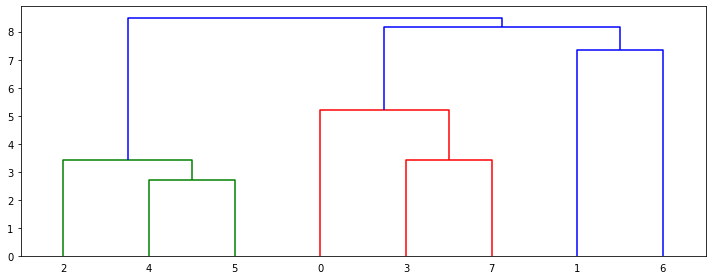

In [87]:
linkage_matrix=single(dists)
fig,ax=plt.subplots(figsize=(10,4))
# Construímos el dendograma (árbol jerárquico)
R=dendrogram(linkage_matrix, orientation="top",
             truncate_mode='lastp', p=100, leaf_font_size=10.,no_plot=False)
plt.tight_layout()

### Complete-link

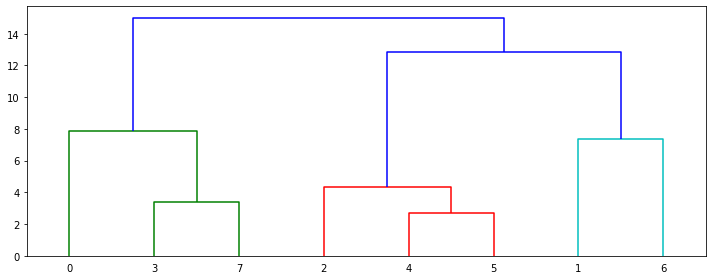

In [88]:
linkage_matrix=complete(dists)
fig,ax=plt.subplots(figsize=(10,4))
# Construímos el dendograma (árbol jerárquico)
R=dendrogram(linkage_matrix, orientation="top",
             truncate_mode='lastp', p=100, leaf_font_size=10.,no_plot=False)
plt.tight_layout()

### Average-link

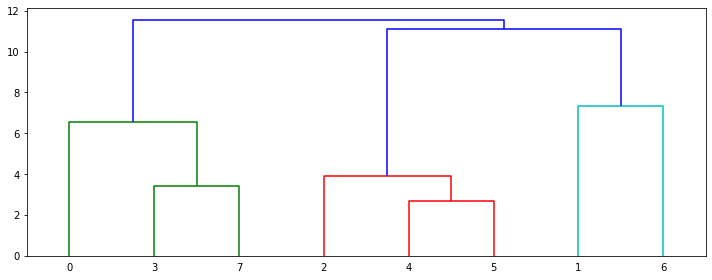

In [89]:
linkage_matrix=average(dists)
fig,ax=plt.subplots(figsize=(10,4))
# Construímos el dendograma (árbol jerárquico)
R=dendrogram(linkage_matrix, orientation="top",
             truncate_mode='lastp', p=100, leaf_font_size=10.,no_plot=False)
plt.tight_layout()

### Prototype (Centroide)

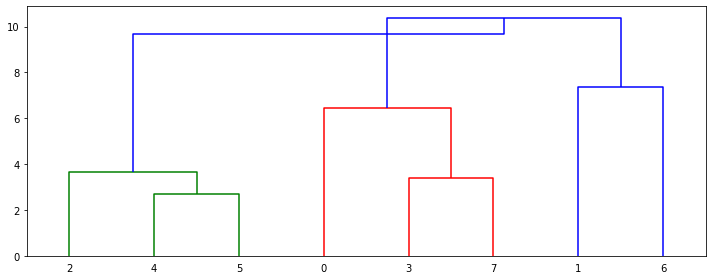

In [90]:
linkage_matrix=centroid(dists)
fig,ax=plt.subplots(figsize=(10,4))
# Construímos el dendograma (árbol jerárquico)
R=dendrogram(linkage_matrix, orientation="top",
             truncate_mode='lastp', p=100, leaf_font_size=10.,no_plot=False)
plt.tight_layout()

## 7) Dado un conjunto de ejemplos categóricos de 5 dimensiones:

In [91]:
Y=np.array([[1,0,1,1,0],[1,1,0,1,0],[0,0,1,1,0],[0,1,0,1,0],[1,0,1,0,1],[0,1,1,0,0]])
Y

array([[1, 0, 1, 1, 0],
       [1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0]])

### a) Aplique agrupamiento jerárquico aglomerativo, usando:

**1) Medida intercluster enlace simple (single link o MIN) basado en el coeficiente de Rao. Diagramar el dendograma**

Se calculan las distancias o similitudes basados en el coeficiente de Rao, obteniendo la siguiente matríz:

In [92]:
distrao=np.zeros((6,6))

for i in range(0,6):
  for j in range(0,6):
    C=Y[i]
    D=Y[j]
    suma=0
    for k in range(0,len(C)):
      if C[k]==1 and C[k]==D[k]:
        suma += 1
    distrao[i,j]=suma/len(C)
distrao

array([[0.6, 0.4, 0.4, 0.2, 0.4, 0.2],
       [0.4, 0.6, 0.2, 0.4, 0.2, 0.2],
       [0.4, 0.2, 0.4, 0.2, 0.2, 0.2],
       [0.2, 0.4, 0.2, 0.4, 0. , 0.2],
       [0.4, 0.2, 0.2, 0. , 0.6, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2, 0.4]])

Posteriormente, se realiza el dendograma utilizando la medida intercluster de enlace simple, y se tiene lo siguiente:

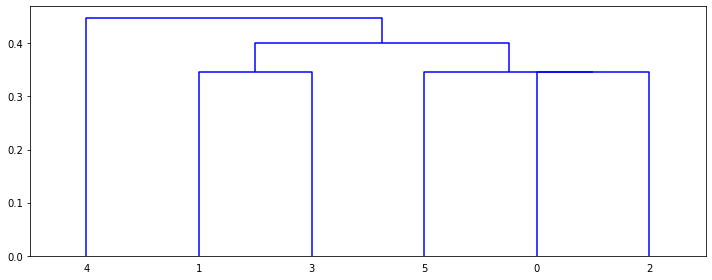

In [93]:
linkage_matrix=single(distrao)
fig,ax=plt.subplots(figsize=(10,4))
# Construímos el dendograma (árbol jerárquico)
R=dendrogram(linkage_matrix, orientation="top",
             truncate_mode='lastp', p=100, leaf_font_size=10.,no_plot=False)
plt.tight_layout()

**2)Medida intercluster enlace completo (complete link o MAX) basado en coeficiente de correspondencia simple CCS (su sigla en inglés, SMC Simple Matching Coeficient). Diagramar el dendograma**

Se calculan las distancias o similitudes basados en el coeficiente de correspondencia simple, obteniendo la siguiente matríz:

In [94]:
distsmc=np.zeros((6,6))

for i in range(0,6):
  for j in range(0,6):
    C=Y[i]
    D=Y[j]
    suma=0
    for k in range(0,len(C)):
      if C[k]==D[k]:
        suma += 1
    distsmc[i,j]=suma/len(C)
distsmc


array([[1. , 0.6, 0.8, 0.4, 0.6, 0.4],
       [0.6, 1. , 0.4, 0.8, 0.2, 0.4],
       [0.8, 0.4, 1. , 0.6, 0.4, 0.6],
       [0.4, 0.8, 0.6, 1. , 0. , 0.6],
       [0.6, 0.2, 0.4, 0. , 1. , 0.4],
       [0.4, 0.4, 0.6, 0.6, 0.4, 1. ]])

Posteriormente, se realiza el dendograma utilizando la medida intercluster de enlace completo, y se tiene lo siguiente:

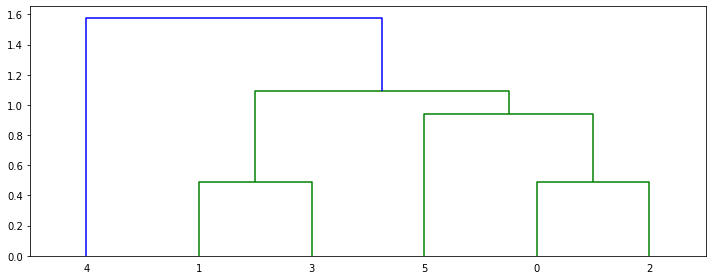

In [95]:
linkage_matrix=complete(distsmc)
fig,ax=plt.subplots(figsize=(10,4))
# Construímos el dendograma (árbol jerárquico)
R=dendrogram(linkage_matrix, orientation="top",
             truncate_mode='lastp', p=100, leaf_font_size=10.,no_plot=False)
plt.tight_layout()

### b) ¿Es posible usar una medida intercluster basada en prototipos? Si es posible, ¿cuál sería?



Como se ve a continuación, se puede usar una medida basada en prototipos, con centroides, y el dendograma se puede diagramar, en este caso se usa el coeficiente SMC, sin embargo, nótese que la interpretación en este caso es más complicada, debido a que al utilizar centroides y nuestro conjunto de datos es binario, el cálculo de sus distancias es más complejo de entender.

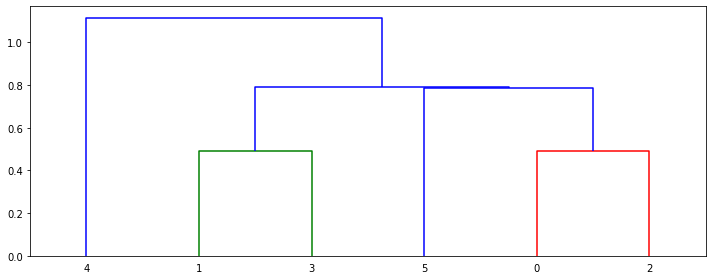

In [97]:
linkage_matrix=centroid(distsmc)
fig,ax=plt.subplots(figsize=(10,4))
# Construímos el dendograma (árbol jerárquico)
R=dendrogram(linkage_matrix, orientation="top",
             truncate_mode='lastp', p=100, leaf_font_size=10.,no_plot=False)
plt.tight_layout()

### c) ¿Es posible usar el método de Ward? Explique.

Como se puede ver en los siguientes diagramas, si es posible hacer uso del método de Ward, notese que se uso para tres distancias o coeficientes diferentes y de igual manera se logró obtener el dendograma correspondiente. Debido a que los clusters se clasifican según la proximidad entre sus erreore cuadráticos, se puede ver que el primer dendograma calculado con el coeficiente SMC y el tercero calculado con la distancia euclidiana, son muy parecidos, mientras que el segundo (coeficiente de Rao) cambia con respecto a los otros dos.

**Coeficiente SMC**

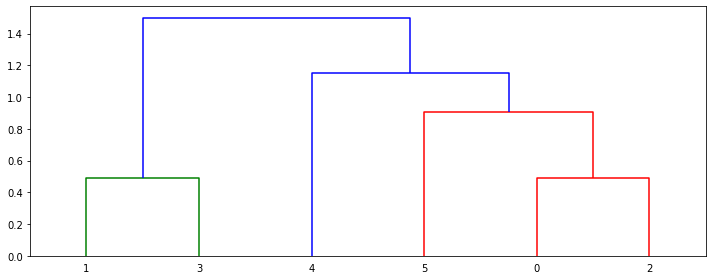

In [98]:
linkage_matrix=ward(distsmc)
fig,ax=plt.subplots(figsize=(10,4))
# Construímos el dendograma (árbol jerárquico)
R=dendrogram(linkage_matrix, orientation="top",
             truncate_mode='lastp', p=100, leaf_font_size=10.,no_plot=False)
plt.tight_layout()

**Coeficiente Rao**

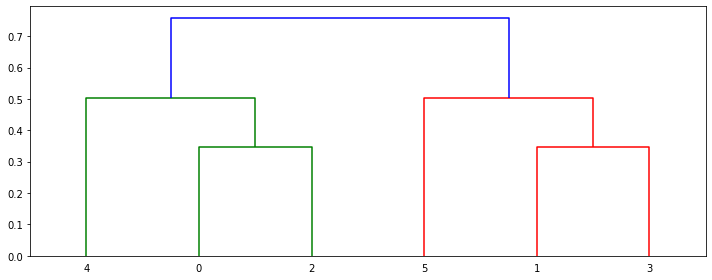

In [99]:
linkage_matrix=ward(distrao)
fig,ax=plt.subplots(figsize=(10,4))
# Construímos el dendograma (árbol jerárquico)
R=dendrogram(linkage_matrix, orientation="top",
             truncate_mode='lastp', p=100, leaf_font_size=10.,no_plot=False)
plt.tight_layout()

**Distancia euclidiana**

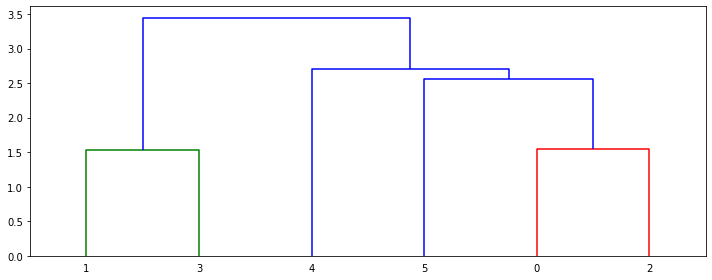

In [100]:
dists=euclidean_distances(Y)
linkage_matrix=ward(dists)
fig,ax=plt.subplots(figsize=(10,4))
# Construímos el dendograma (árbol jerárquico)
R=dendrogram(linkage_matrix, orientation="top",
             truncate_mode='lastp', p=100, leaf_font_size=10.,no_plot=False)
plt.tight_layout()

## 8) Algoritmos jerárquicos son usados para generar K grupos (K >1) tomando los grupos al nivel Kth del dendograma. Analizando los grupos generados de esta forma, se puede evaluar el comportamiento del algoritmo en diferentes tipos de datos y grupos, e incluso comparar con los resultados generados por el algoritmo K-means.

## Si se tiene el siguiente conjunto de puntos en una dimensión: {6,12,18,24,30,42,48}

### a) Por cada uno de los siguientes conjuntos de centroides iniciales, crear dos (2) grupos asumiendo cada punto al centroide más cercano, y luego calcular el error cuadrado total por cada conjunto de dos grupos. Mostrar los grupos y el error cuadrado total por cada conjunto de centroides:
### 1) {18, 45}


In [101]:
P=np.array([6,12,18,24,30,42,48])
c1=18
c2=45
cluster0=[]
cluster1=[]
for i in range(0,len(P)):
  if abs(c1-P[i])<abs(c2-P[i]):
    cluster0.append(P[i])
  else:
    cluster1.append(P[i])
print(f"cluster0:{cluster0}")
print(f"cluster1:{cluster1}")

cluster0:[6, 12, 18, 24, 30]
cluster1:[42, 48]


In [102]:
SSE1=0
for i in range(0,len(cluster0)):
  y=(c1-cluster0[i])**2
  SSE1+=y
SSE2=0
for i in range(0,len(cluster1)):
  y=(c2-cluster1[i])**2
  SSE2+=y
print(f"La suma de cuadrados de los errores totales en el cluster 0 es {SSE1}")
print(f"La suma de cuadrados de los errores totales en el cluster 1 es {SSE2}")

La suma de cuadrados de los errores totales en el cluster 0 es 360
La suma de cuadrados de los errores totales en el cluster 1 es 18


### 2) {15, 40}

In [103]:
c3=15
c4=40
cluster2=[]
cluster3=[]
for i in range(0,len(P)):
  if abs(c3-P[i])<abs(c4-P[i]):
    cluster2.append(P[i])
  else:
    cluster3.append(P[i])
print(f"cluster0:{cluster2}")
print(f"cluster1:{cluster3}")

cluster0:[6, 12, 18, 24]
cluster1:[30, 42, 48]


In [104]:
SSE3=0
for i in range(0,len(cluster2)):
  y=(c3-cluster2[i])**2
  SSE3+=y
SSE4=0
for i in range(0,len(cluster3)):
  y=(c4-cluster3[i])**2
  SSE4+=y
print(f"La suma de cuadrados de los errores totales en el cluster 0 es {SSE3}")
print(f"La suma de cuadrados de los errores totales en el cluster 1 es {SSE4}")

La suma de cuadrados de los errores totales en el cluster 0 es 180
La suma de cuadrados de los errores totales en el cluster 1 es 168


### b) Ambas soluciones representan soluciones estables. Si el K-means se ejecutara tomando como centroides iniciales los centroides dados, ¿Habría algún cambio en los grupos generados?

### 1) {18, 45}

Si se usa KMeans para el mismo conjunto de datos, usando como centroides a {18, 45} se puede observar que se obtiene el mismo agrupamiento:

In [105]:
P1=np.array([[6,0],[12,0],[18,0],[24,0],[30,0],[42,0],[48,0]])
c11=[18,0]
c22=[45,0]
n_clusters = 2
initialpnts=np.array([c11,c22])
km = KMeans( n_clusters=n_clusters, init=initialpnts)
km.fit(P1)
y = km.predict(P1)
cluster5=[]
cluster6=[]
for i in range(0,len(y)):
  if y[i]==0:
    cluster5.append(P1[i,0])
  else:
    cluster6.append(P1[i,0])
print(f"cluster0 usando KMeans:{cluster5}")
print(f"cluster1 usando KMeans:{cluster6}")
 

cluster0 usando KMeans:[6, 12, 18, 24, 30]
cluster1 usando KMeans:[42, 48]


### 2) {15, 40}

Si se usa KMeans para el mismo conjunto de datos, usando como centroides a {15, 40} se puede observar que se obtiene el siguiente agrupamiento:

In [106]:
c33=[15,0]
c44=[40,0]
n_clusters = 2
initialpnts2=np.array([c33,c44])
km = KMeans( n_clusters=n_clusters, init=initialpnts2)
km.fit(P1)
y2 = km.predict(P1)
cluster7=[]
cluster8=[]
for i in range(0,len(y2)):
  if y2[i]==0:
    cluster7.append(P1[i,0])
  else:
    cluster8.append(P1[i,0])
print(f"cluster0 usando KMeans:{cluster7}")
print(f"cluster1 usando KMeans:{cluster8}")

cluster0 usando KMeans:[6, 12, 18, 24]
cluster1 usando KMeans:[30, 42, 48]


Nuevamente, observando lo anterior, se tiene que los clusters son los mismos a los realizados haciendo el procedimiento anterior

### c) ¿Cuales serían los grupos producidos usando single link?

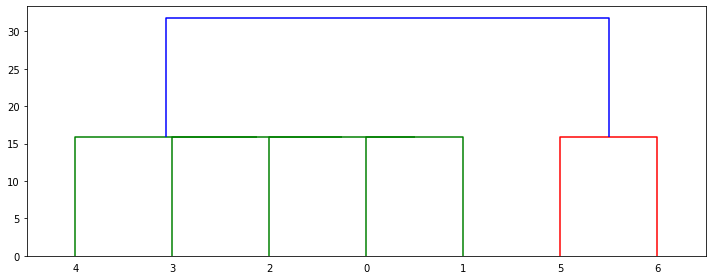

In [107]:
dists=euclidean_distances(P1)
linkage_matrix=single(dists)
fig,ax=plt.subplots(figsize=(10,4))
# Construímos el dendograma (árbol jerárquico)
R=dendrogram(linkage_matrix, orientation="top",
             truncate_mode='lastp', p=100, leaf_font_size=10.,no_plot=False)
plt.tight_layout()

Como se observa en el dendograma anterior realizado usando el enlace simple (single link), se puede concluir que los grupos obtenidos son 

*  K1 = {6, 12, 18, 24, 30}
*  K2 = {42, 48}

Tal como se encontró en los procedimientos anteriores cuando se usaron como centroides los números {18, 45}

### d) ¿Cuál algoritmo, K-means o Single link, parece producir la solución “más natural”?

Por lo visto anteriormente, se puede decir que se produce de manera más natural el algorítmo usando el enlace simple, esto debido a que la agrupación realizada no depende de la imposición de centroides iniciales, o de cualquier otro tipo de inicialización, y consecuentemente, tampoco de la cantidad de grupos o clusters que se quieren obtener, simplemente con base en sus distancias, el single link, calcula los cluster dada su proximidad. 

### e) ¿Cuál definición de agrupación corresponde mejor a la solución generada? (grupos bien separados, basados en centro, densos, cercanos, etc.). ¿Cuál característica del algoritmo k-means explica ese comportamiento?

Debido a la característica de los datos, se podría pensar que la definición que mejor se adecua a la solución generada es la de grupos basados en su cercanía, debido a que se obtuvieron aquellos grupos donde su distancia siempre fue uniforme, y aquellos que no estaban dentro de los estandares de la distancia, los agruparon en otro cluster, lo que haría pensar en que se generó debido a su proximidad.

La característica de los KMeans que explica este comportamiento es que trata de minimizar el error cuadrático de los puntos medidos.

## 9) Aplicar el algoritmo DBScan, a los datos del ejercicio 3, usando la distancia Euclidean. Usar Epsilon = 2 y minpoint = 2. Dibujar cada 10 iteraciones el resultado del proceso de agrupación. ¿Que sucede si Epsilon es √10? Explicar.

In [108]:
from sklearn.cluster import DBSCAN

cluster0=[]
cluster1=[]
cluster = DBSCAN(eps=2, min_samples=2).fit(X)
for i in range(0,len(X)):
  if cluster.labels_[i]==0:
    cluster0.append(X[i])
  elif cluster.labels_[i]==1:
    cluster1.append(X[i])
  else:
    print(X[i])
print(cluster0)
print(cluster1)

[ 2 10]
[2 5]
[1 2]
[array([8, 4]), array([7, 5]), array([6, 4])]
[array([5, 8]), array([4, 9])]


Notemos que al usar el algorítmo SBSCAN, este separa dos grupos, cuyos puntos cumplen con los requisitos, por un lado tenemos


*   K1 = {(8, 4), (7, 5), (6, 4)}
*   K2 = {(5, 8), (4, 9)}

Sin embargo, nótese que los puntos (2, 10), (2, 5) y (1, 2) son considerados como "outliers" debido a que no se pueden agrupar con ninguno de los grupos mencionados anteriormente, ni tampoco generar un nuevo grupo.



In [118]:
import math

cluster11 = DBSCAN(eps=math.sqrt(10), min_samples=2).fit(X)
cluster0=[]
cluster1=[]
cluster2=[]

for i in range(0,len(X)):
  if cluster11.labels_[i]==0:
    cluster0.append(X[i])
  elif cluster11.labels_[i]==1:
    cluster1.append(X[i])
  else:
    cluster2.append(X[i])
print(cluster0)
print(cluster1)
print(cluster2)


[array([ 2, 10]), array([5, 8]), array([4, 9])]
[array([2, 5]), array([1, 2])]
[array([8, 4]), array([7, 5]), array([6, 4])]


Si se aumenta el radio, como se hizo anteriormente, que se uso un radio de raíz de 10, los grupos de antes siguen conformados, salvo que ahora a K2 se le agrego el punto (2, 10), y los otros dos puntos que se presentaban como "outliers" ahora representan un nuevo grupo.

## 10. Usar el conjunto de datos “Perfume Data Data Set” del repositorio UCI (Machine Learning), para aplicar los algoritmos: single link, complete link average ling y Ward. Usar cualquier herramienta de software. Mostrar dendogramas y explicar resultados.

In [0]:
data = pd.read_csv("perfume_data.csv",sep=';',)
data=data.drop(['ajayeb'],axis=1)


A continuación se realiza el dendograma utilizando el método de enlace simple y las distancias euclidianas, se uede observar que se esta agrupando una cantidad grande de objetos en el centro, mientras que la observación 10 se considera como un outlier.

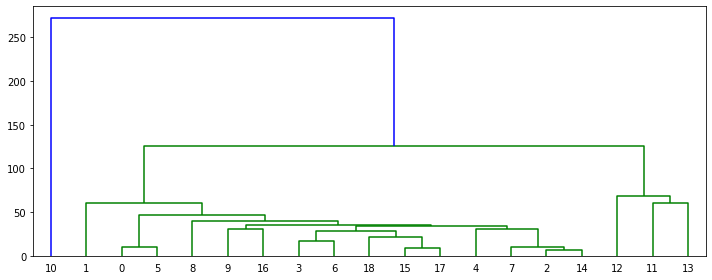

In [121]:
dists=euclidean_distances(data)
linkage_matrix=single(dists)
fig,ax=plt.subplots(figsize=(10,4))
# Construímos el dendograma (árbol jerárquico)
R=dendrogram(linkage_matrix, orientation="top",
             truncate_mode='lastp', p=100, leaf_font_size=10.,no_plot=False)
plt.tight_layout()

Luego, de nuevo usando las distancias euclidianas, se grafica el dendograma, esta vez, con el método de enlace completo, los grupos parecen estar mejor conformados y más uniformes. Nótese que la observación 10 sigue considerándose como un outlier.

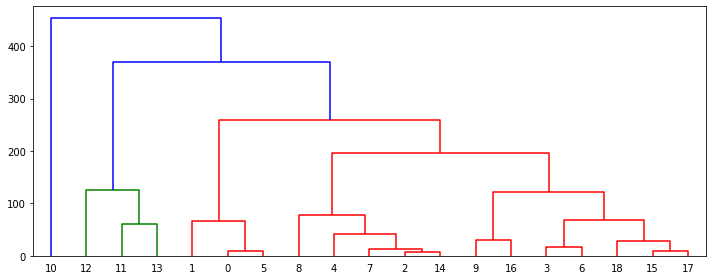

In [122]:
linkage_matrix=complete(dists)
fig,ax=plt.subplots(figsize=(10,4))
# Construímos el dendograma (árbol jerárquico)
R=dendrogram(linkage_matrix, orientation="top",
             truncate_mode='lastp', p=100, leaf_font_size=10.,no_plot=False)
plt.tight_layout()

Ahora, por el método de average, o promedio, se puede observar que los grupos conformados son muy similares a los conformados por el enlace completo.

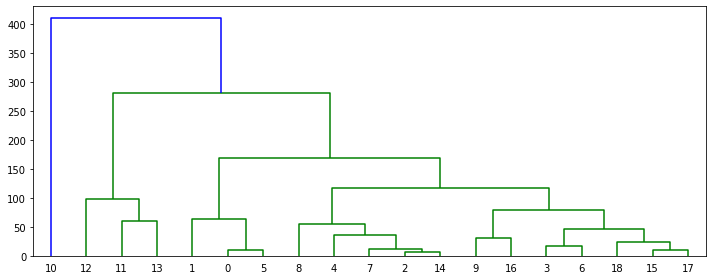

In [123]:
linkage_matrix=average(dists)
fig,ax=plt.subplots(figsize=(10,4))
# Construímos el dendograma (árbol jerárquico)
R=dendrogram(linkage_matrix, orientation="top",
             truncate_mode='lastp', p=100, leaf_font_size=10.,no_plot=False)
plt.tight_layout()

Y por último, usando el método Ward, las agrupaciones son, aunque se muestran en un diferente orden a las anteriores, muy similares a las de average y enlace completo, manteniendo al 10 como un outlier.

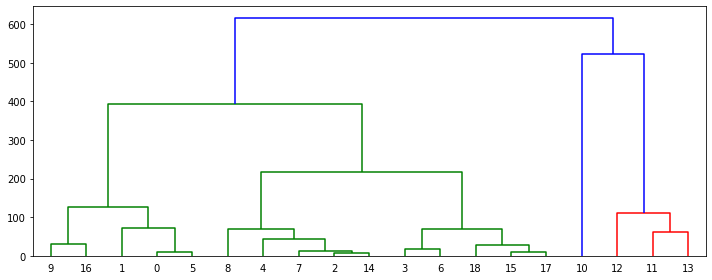

In [124]:
linkage_matrix=ward(dists)
fig,ax=plt.subplots(figsize=(10,4))
# Construímos el dendograma (árbol jerárquico)
R=dendrogram(linkage_matrix, orientation="top",
             truncate_mode='lastp', p=100, leaf_font_size=10.,no_plot=False)
plt.tight_layout()

## 11) Calcular pureza y entropía (medidas externas) de la siguiente matriz de confusión,

In [125]:
data2={'grupos/clases':['c1','c2','c3','c4','c5','c6','total'],
       '#g1':[1,1,0,11,4,676,693],
       '#g2':[27,89,333,827,253,33,1562],
       '#g3':[326,465,8,105,16,29,949],
       'total':[353,555,341,943,273,738,3204]}
df2=pd.DataFrame(data2)
Z=df2.drop(['grupos/clases'],axis=1)
Z

,#g1,#g2,#g3,total
0,1,27,326,353
1,1,89,465,555
2,0,333,8,341
3,11,827,105,943
4,4,253,16,273
5,676,33,29,738
6,693,1562,949,3204


In [126]:
np.array(Z)

array([[   1,   27,  326,  353],
       [   1,   89,  465,  555],
       [   0,  333,    8,  341],
       [  11,  827,  105,  943],
       [   4,  253,   16,  273],
       [ 676,   33,   29,  738],
       [ 693, 1562,  949, 3204]])